In [326]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars_raw = pd.read_csv("otomoto_cars_parsed2.csv", low_memory=False)
cars = cars_raw.copy()

In [327]:
cars.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206562 entries, 0 to 206561
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Listing_URL                          206562 non-null  object 
 1   Make                                 206562 non-null  object 
 2   Model                                206562 non-null  object 
 3   Body_Type                            206562 non-null  object 
 4   Fuel_Type                            206562 non-null  object 
 5   Gearbox                              206562 non-null  object 
 6   Transmission                         206562 non-null  object 
 7   Mileage                              206562 non-null  int64  
 8   Engine_Capacity                      206562 non-null  int64  
 9   Engine_Power                         206562 non-null  int64  
 10  No_Accidents                         206562 non-null  int64  
 11  Service_Recor

In [328]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 20)
cars.head(10)

Listing_URL        Make        Model      Body_Type     Fuel_Type  \
0  https://www.otom...  Volkswagen         Golf        Kompakt  Petrol-based   
1  https://www.otom...        Opel        Mokka            SUV        Diesel   
2  https://www.otom...     Hyundai         ix35            SUV  Petrol-based   
3  https://www.otom...         Kia         Ceed          Kombi  Petrol-based   
4  https://www.otom...        Audi           Q7            SUV  Petrol-based   
5  https://www.otom...      Toyota         RAV4            SUV  Petrol-based   
6  https://www.otom...     Porsche  718 Boxster      Kabriolet  Petrol-based   
7  https://www.otom...        Opel        Corsa  Auta miejskie  Petrol-based   
8  https://www.otom...         Kia         Ceed  Auta miejskie  Petrol-based   
9  https://www.otom...         Kia        Venga            SUV  Petrol-based   

        Gearbox Transmission  Mileage  Engine_Capacity  Engine_Power  \
0      Manualna          FWD   150000             1984           210   
1      Manualna          FWD   151200             1686           130   
2      Manualna          FWD   125000             1591           135   
3      Manualna          FWD   145000             1591           135   
4  Automatyczna          AWD    89000             2995           340   
5      Manualna          AWD   184000             1987           158   
6  Automatyczna          RWD       17             1988           300   
7      Manualna          FWD    75780             1398           100   
8      Manualna          FWD   154000             1396           109   
9  Automatyczna          FWD    53000             1591           125   

   No_Accidents  Service_Record  Is_Imported  First_Owner  \
0             1               1            1            0   
1             1               1            1            1   
2             1               1            1            1   
3             1               1            1            1   
4             0               0            1            0   
5             1               1            1            0   
6             1               0            0            1   
7             0               0            0            0   
8             1               1            0            0   
9             1               1            1            0   

   Professional_Seller     Full_Description Equipment_Audio_and_Multimedia  \
0                    0  Volkswagen Golf ...            ["Radio"]             
1                    0  Opel Mokka 1.7 C...  ["Interfejs Blue...             
2                    0  Hyundai ix35 1.6...  ["Interfejs Blue...             
3                    0  Kia Ceed 1.6 GDI...  ["Interfejs Blue...             
4                    0  Audi Q7 55 TFSI ...  ["Android Auto",...             
5                    0  Toyota RAV4 2.0 ...  ["Interfejs Blue...             
6                    0  Porsche 718 Boxs...  ["Radio", "Syste...             
7                    0  Opel Corsa 1.4 1...  ["Android Auto",...             
8                    0  Kia Ceed Cee'd 1...  ["Radio", "Gniaz...             
9                    1  Kia Venga 1.6 CV...  ["Interfejs Blue...             

  Equipment_Comfort_and_Extras Equipment_Driver_Assistance_Systems  \
0  ["Klimatyzacja a...          ["Kontrola odleg...                  
1  ["Klimatyzacja a...          ["Tempomat", "La...                  
2  ["Klimatyzacja a...          ["Podgrzewane lu...                  
3  ["Klimatyzacja m...          ["Tempomat", "La...                  
4  ["Klimatyzacja a...          ["Tempomat", "La...                  
5  ["Klimatyzacja a...          ["Tempomat", "Po...                  
6  ["Klimatyzacja a...          ["Lampy bi-kseno...                  
7  ["Klimatyzacja m...          ["Lusterka boczn...                  
8  ["Tapicerka mate...          ["Światła do jaz...                  
9  ["Hak", "Klimaty...          ["Tempomat", "Ko...                  

  Equipment_Performance_and_Tuning 

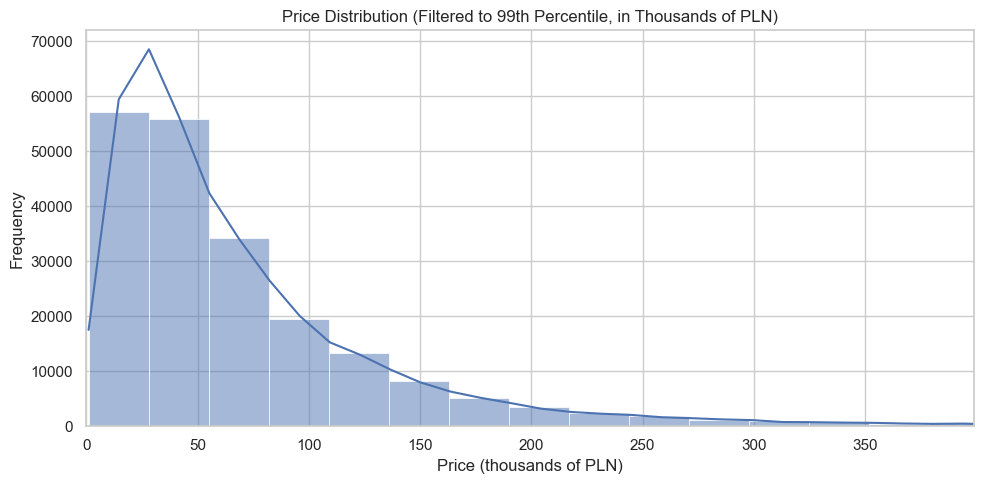

In [329]:
# Set plotting style
sns.set(style="whitegrid")

# Convert price to thousands
cars['Price_thousands'] = cars['Price'] / 1000

# 99th percentile cap for plotting
price_cap_thousands = cars['Price_thousands'].quantile(0.99)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(cars['Price_thousands'], bins=100, kde=True)
plt.title('Price Distribution (Filtered to 99th Percentile, in Thousands of PLN)')
plt.xlabel('Price (thousands of PLN)')
plt.ylabel('Frequency')
plt.xlim(0, price_cap_thousands)
plt.tight_layout()
plt.show()



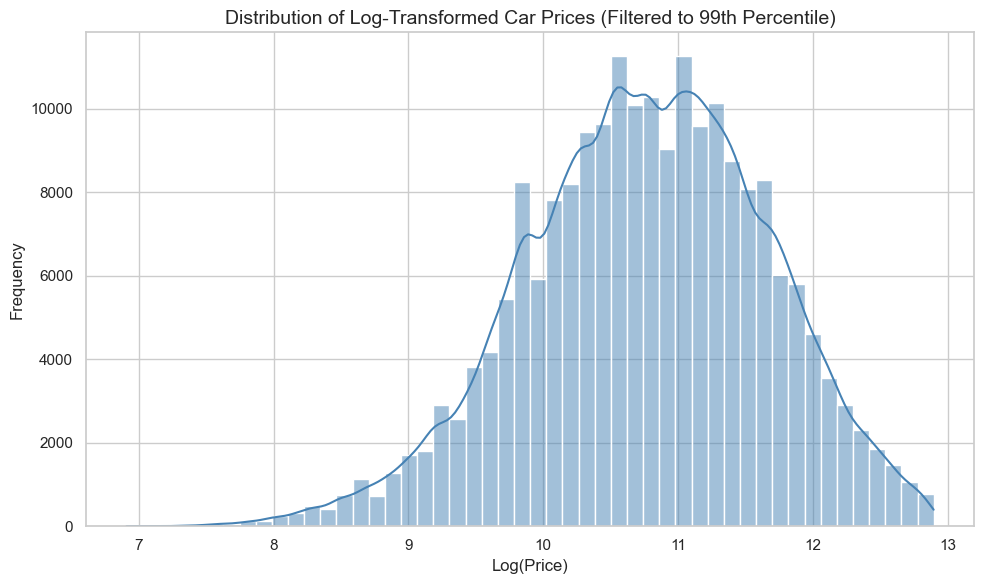

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

# Styl wykresów
sns.set(style="whitegrid")

# Filtrowanie do 99. percentyla (opcjonalnie)
filtered = cars[cars['Log_Price'] <= cars['Log_Price'].quantile(0.99)]

# Wykres
plt.figure(figsize=(10, 6))
sns.histplot(filtered['Log_Price'], bins=50, kde=True, color='steelblue', edgecolor='white')

# Oznaczenia
plt.xlabel("Log(Price)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Log-Transformed Car Prices (Filtered to 99th Percentile)", fontsize=14)
plt.tight_layout()
plt.show()

Descriptive statistics for Price:
count    2.065620e+05
mean     7.333886e+04
std      8.569304e+04
min      1.000000e+03
25%      2.590000e+04
50%      4.890000e+04
75%      8.990000e+04
max      2.699000e+06
Name: Price, dtype: float64

Descriptive statistics for Log(Price):
count    206562.000000
mean         10.780616
std           0.928511
min           6.908755
25%          10.162037
50%          10.797553
75%          11.406464
max          14.808392
Name: Log_Price, dtype: float64


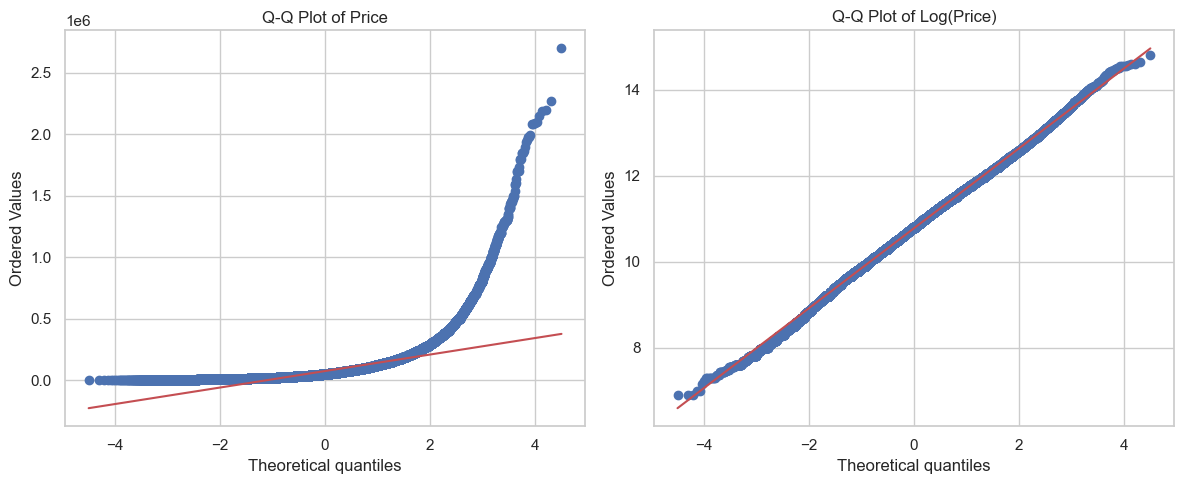

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# [1] Statystyki opisowe
print("Descriptive statistics for Price:")
print(cars['Price'].describe())

print("\nDescriptive statistics for Log(Price):")
print(cars['Log_Price'].describe())

# [2] Q-Q ploty
plt.figure(figsize=(12, 5))

# Q-Q plot dla Price
plt.subplot(1, 2, 1)
stats.probplot(cars['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Price')

# Q-Q plot dla Log(Price)
plt.subplot(1, 2, 2)
stats.probplot(cars['Log_Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log(Price)')

plt.tight_layout()
plt.show()


count    2.065620e+05
mean     1.521059e+05
std      9.155717e+04
min      1.000000e+00
25%      8.377325e+04
50%      1.500000e+05
75%      2.100000e+05
max      2.901980e+06
Name: Mileage, dtype: float64


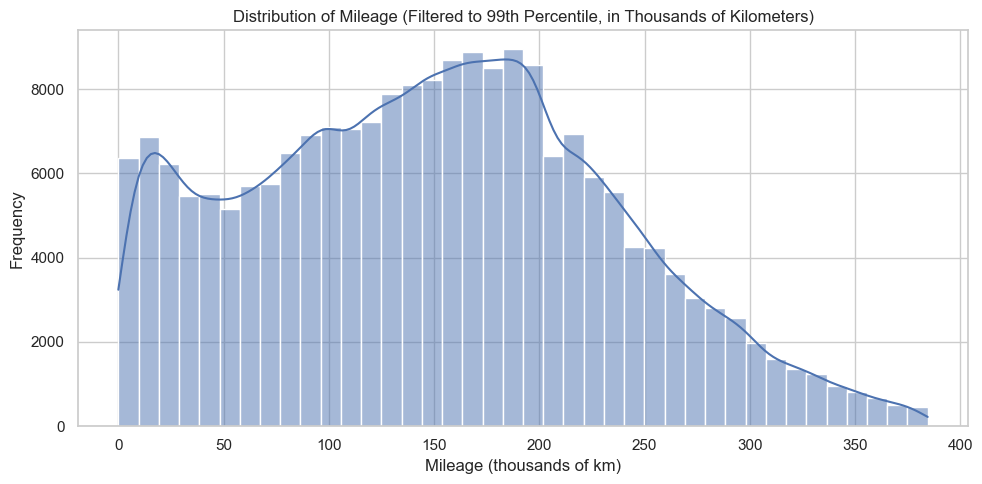

In [332]:
# Sprawdzenie statystyk
print(cars["Mileage"].describe())



# Przeliczenie przebiegu na tysiące km
cars["Mileage_thousands"] = cars["Mileage"] / 1000

# Ustawienie górnej granicy do 99 percentyla (też w tysiącach)
mileage_cap_thousands = cars["Mileage_thousands"].quantile(0.99)

# Wykres
plt.figure(figsize=(10, 5))
sns.histplot(cars[cars["Mileage_thousands"] <= mileage_cap_thousands]["Mileage_thousands"],
             kde=True, bins=40)
plt.title("Distribution of Mileage (Filtered to 99th Percentile, in Thousands of Kilometers)")
plt.xlabel("Mileage (thousands of km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

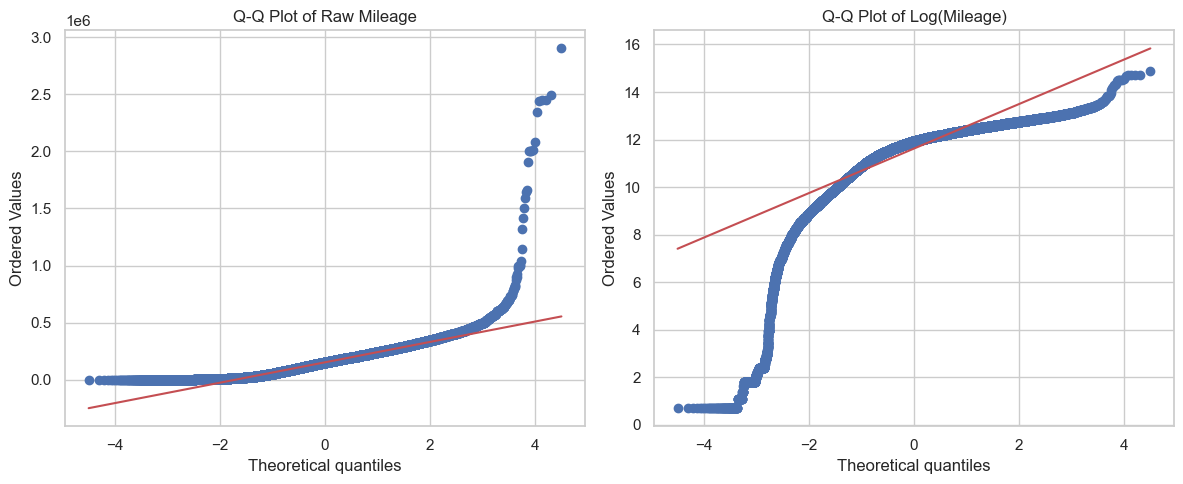

In [333]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 5))

# Q-Q plot for Mileage
plt.subplot(1, 2, 1)
stats.probplot(cars['Mileage'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Raw Mileage")

# Q-Q plot for log(Mileage)
plt.subplot(1, 2, 2)
stats.probplot(cars['Log_Mileage'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log(Mileage)")

plt.tight_layout()
plt.show()

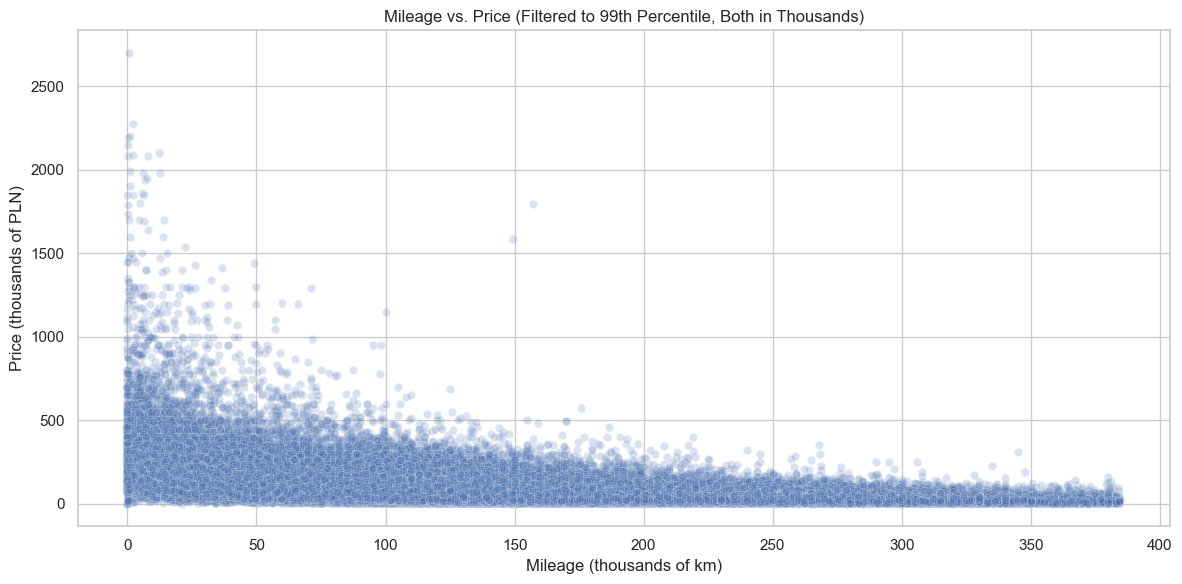

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrowanie danych do 99. percentyla przebiegu
mileage_cap = cars["Mileage"].quantile(0.99)
filtered_cars = cars[cars["Mileage"] <= mileage_cap].copy()

# Przekształcenie jednostek: przebieg i cena w tysiącach
filtered_cars["Mileage_thousands"] = filtered_cars["Mileage"] / 1000
filtered_cars["Price_thousands"] = filtered_cars["Price"] / 1000

# Wykres
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_cars, x="Mileage_thousands", y="Price_thousands", alpha=0.2)
plt.title("Mileage vs. Price (Filtered to 99th Percentile, Both in Thousands)")
plt.xlabel("Mileage (thousands of km)")
plt.ylabel("Price (thousands of PLN)")
plt.tight_layout()
plt.show()

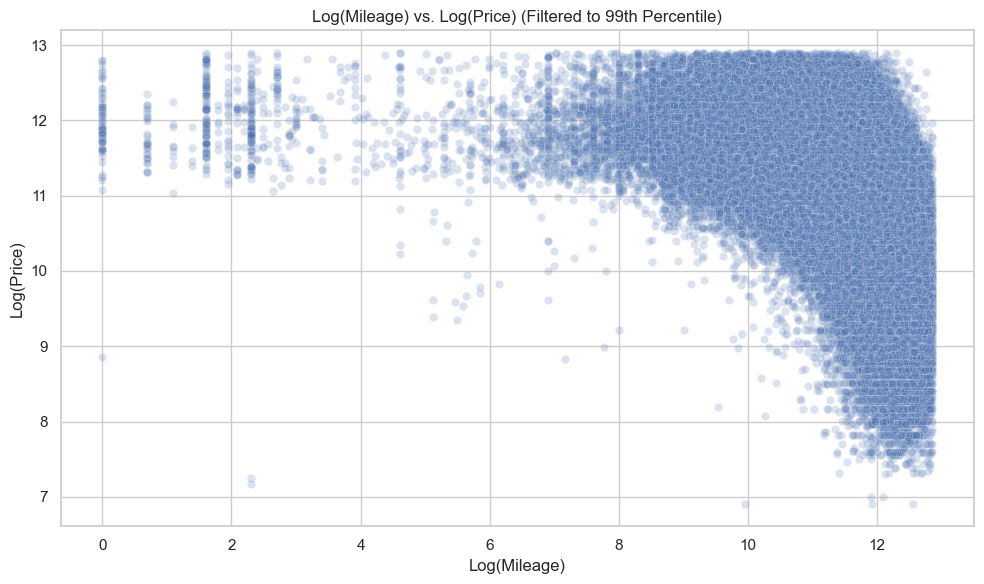

In [335]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrowanie do 99. percentyla
mileage_cap = cars["Mileage"].quantile(0.99)
price_cap = cars["Price"].quantile(0.99)
filtered = cars[(cars["Mileage"] <= mileage_cap) & (cars["Price"] <= price_cap)].copy()

# Tworzenie kolumn logarytmicznych (jeśli nie istnieją)
filtered["Log_Mileage"] = np.log(filtered["Mileage"])
filtered["Log_Price"] = np.log(filtered["Price"])

# Wykres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x="Log_Mileage", y="Log_Price", alpha=0.2)
plt.title("Log(Mileage) vs. Log(Price) (Filtered to 99th Percentile)")
plt.xlabel("Log(Mileage)")
plt.ylabel("Log(Price)")
plt.tight_layout()
plt.show()

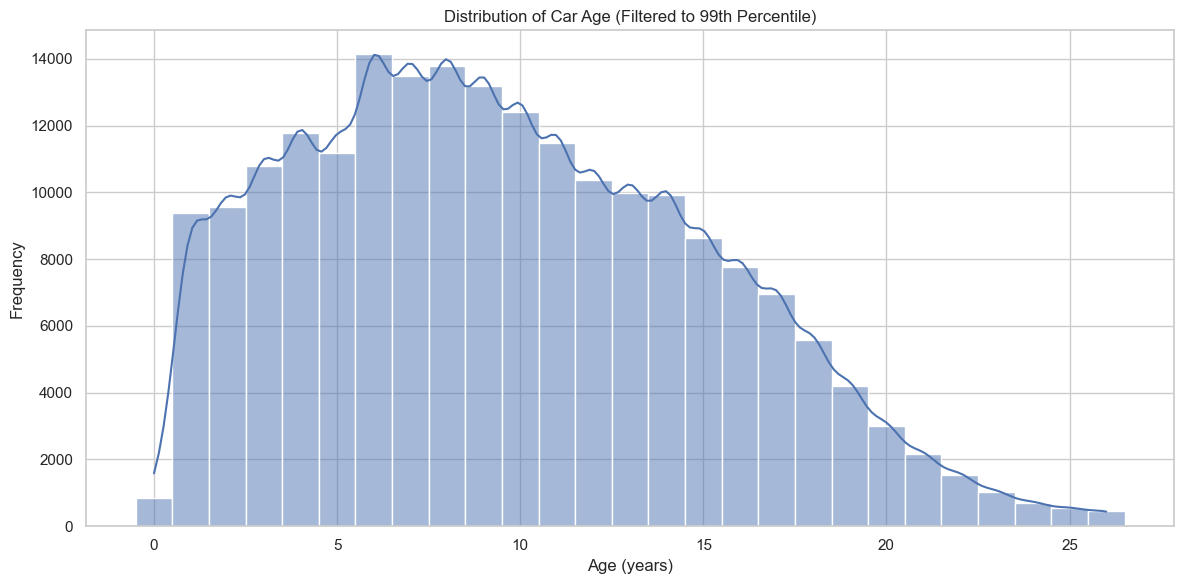

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter




# Oblicz 99. percentyl wieku
age_cap = cars["Age"].quantile(0.99)

# Filtruj dane
filtered_cars = cars[cars["Age"] <= age_cap]

# Wykres histogramu wieku
plt.figure(figsize=(12, 6))
sns.histplot(filtered_cars["Age"], binwidth=1, kde=True, discrete=True)
plt.title("Distribution of Car Age (Filtered to 99th Percentile)")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


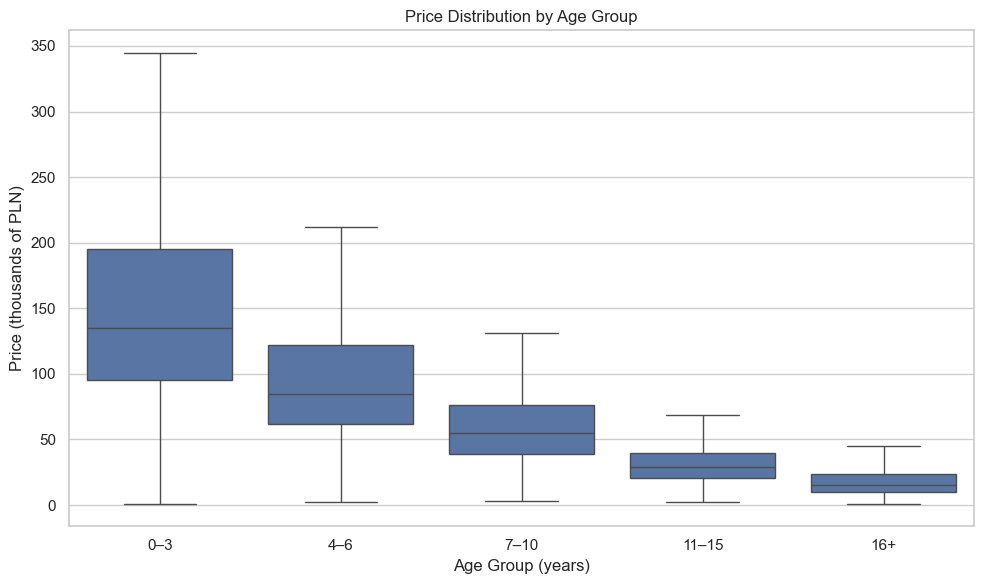

In [337]:
# Definiujemy biny wiekowe
bins = [0, 3, 6, 10, 15, np.inf]
labels = ['0–3', '4–6', '7–10', '11–15', '16+']
cars['Age_Group'] = pd.cut(cars['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=cars, x='Age_Group', y=cars['Price'] / 1000, showfliers=False)
plt.title('Price Distribution by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Price (thousands of PLN)')
plt.tight_layout()
plt.show()

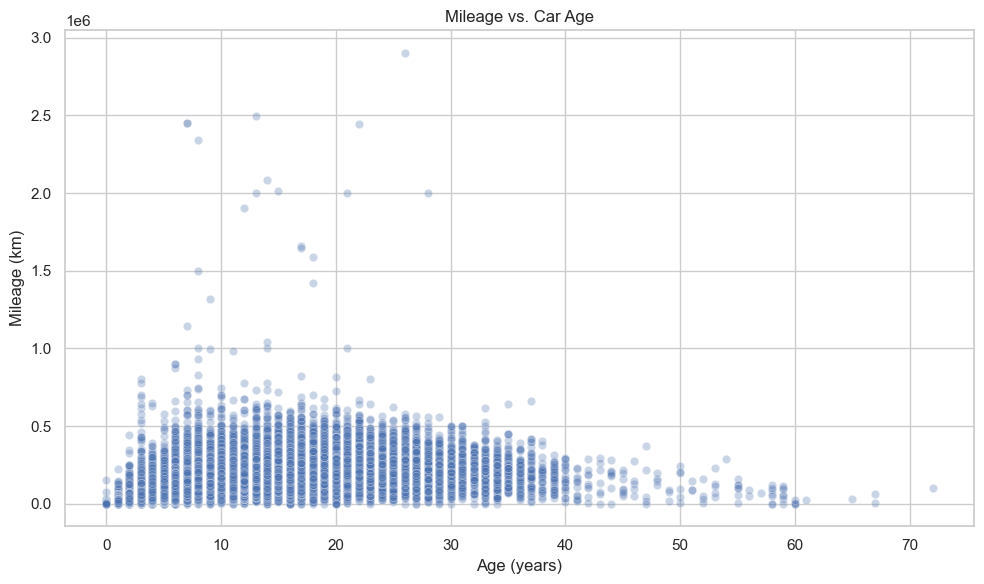

In [338]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars, x='Age', y='Mileage', alpha=0.3)
plt.title('Mileage vs. Car Age')
plt.xlabel('Age (years)')
plt.ylabel('Mileage (km)')
plt.tight_layout()
plt.show()

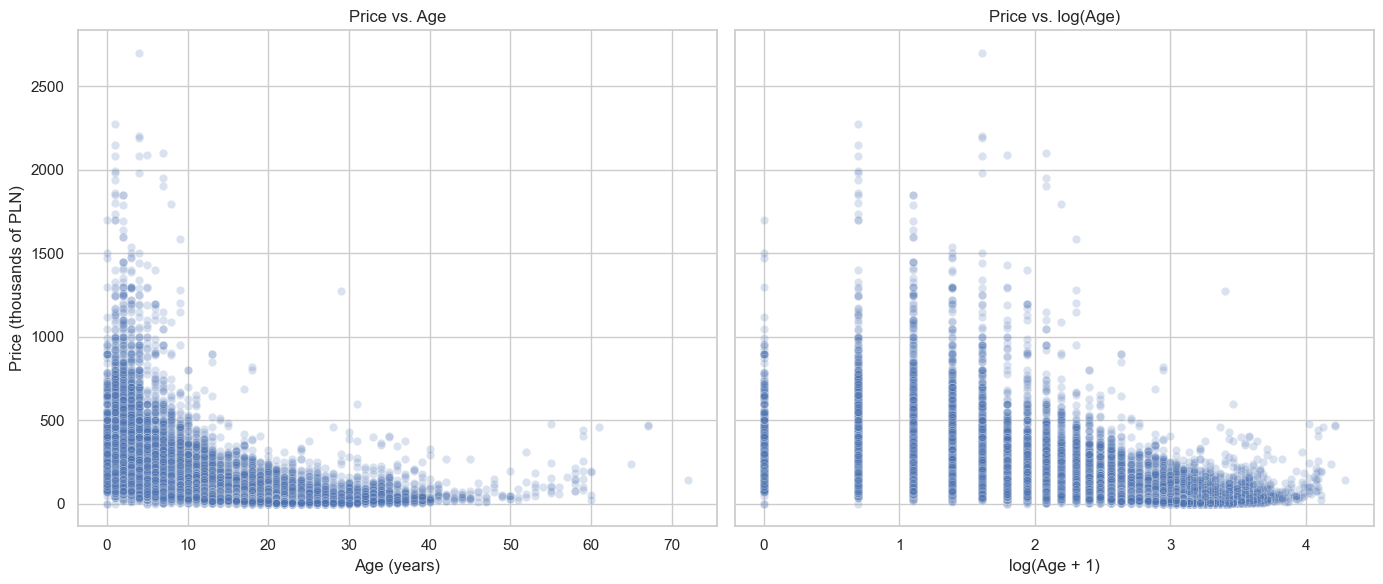

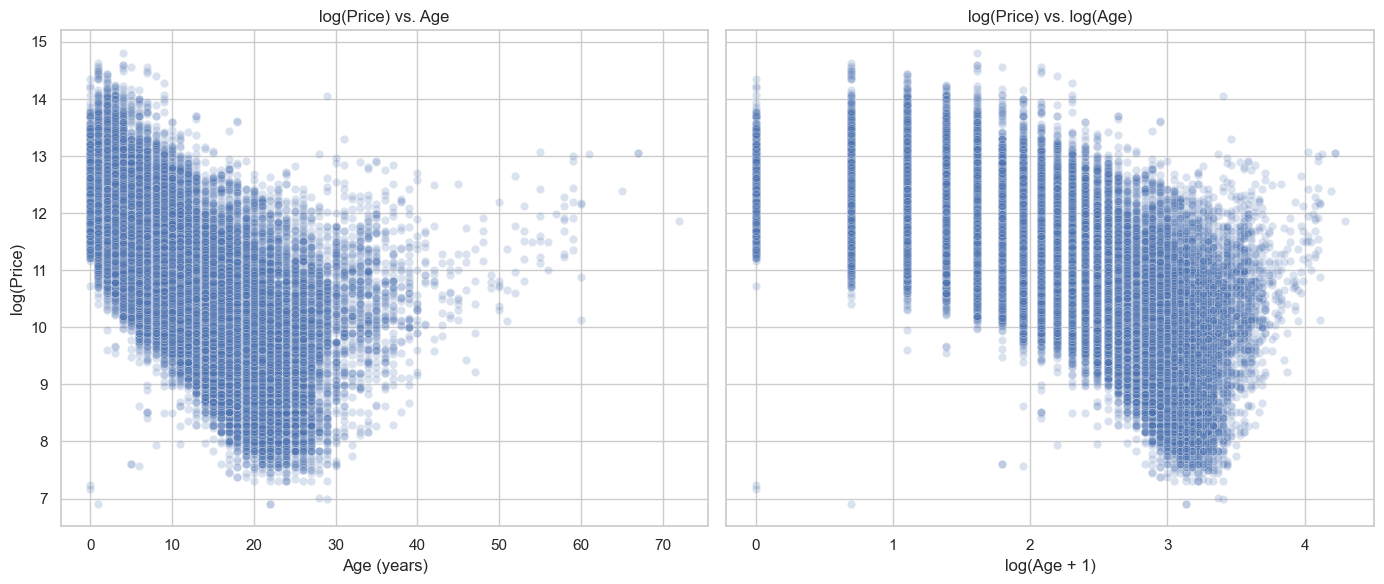

In [339]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter: Price (in thousands) vs. Age and vs. log(Age)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Price vs. Age
sns.scatterplot(data=cars, x='Age', y=cars['Price'] / 1000, alpha=0.2, ax=axes[0])
axes[0].set_title('Price vs. Age')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Price (thousands of PLN)')



# Price vs. log(Age)
sns.scatterplot(data=cars, x='Log_Age', y=cars['Price'] / 1000, alpha=0.2, ax=axes[1])
axes[1].set_title('Price vs. log(Age)')
axes[1].set_xlabel('log(Age + 1)')

fig.tight_layout()
plt.show()

# Similar for log-price prefered:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.scatterplot(data=cars, x='Age', y='Log_Price', alpha=0.2, ax=axes[0])
axes[0].set_title('log(Price) vs. Age')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('log(Price)')

sns.scatterplot(data=cars, x='Log_Age', y='Log_Price', alpha=0.2, ax=axes[1])
axes[1].set_title('log(Price) vs. log(Age)')
axes[1].set_xlabel('log(Age + 1)')
fig.tight_layout()
plt.show()



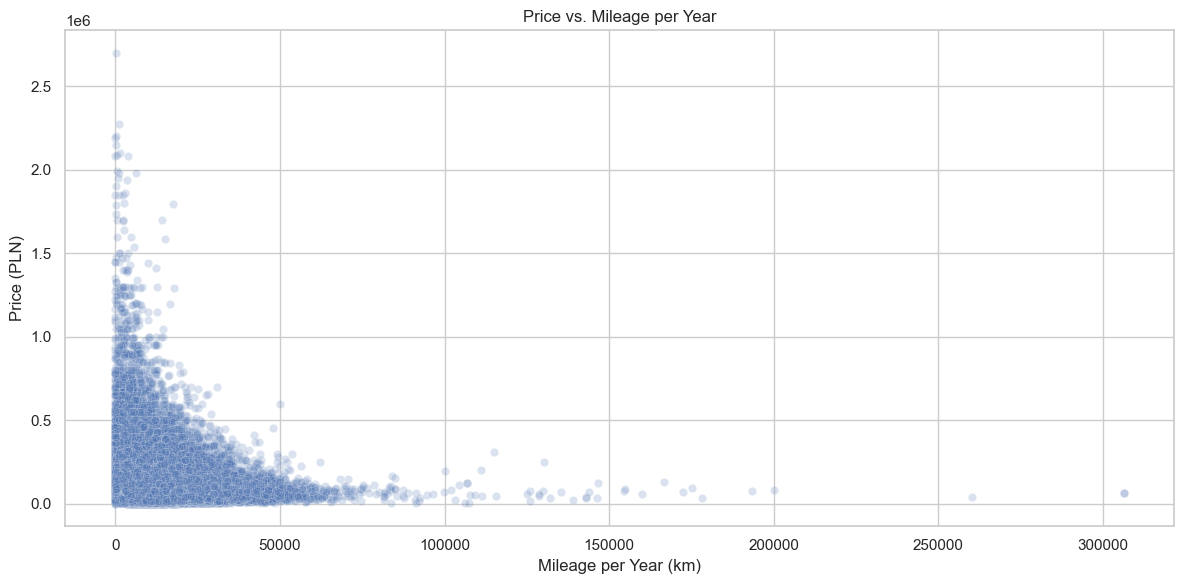

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładam, że masz kolumny: 'Price', 'Mileage', 'Age'
cars['Mileage_per_Year'] = cars['Mileage'] / (cars['Age'] + 1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cars, x='Mileage_per_Year', y='Price', alpha=0.2)
plt.title('Price vs. Mileage per Year')
plt.xlabel('Mileage per Year (km)')
plt.ylabel('Price (PLN)')
plt.tight_layout()
plt.show()

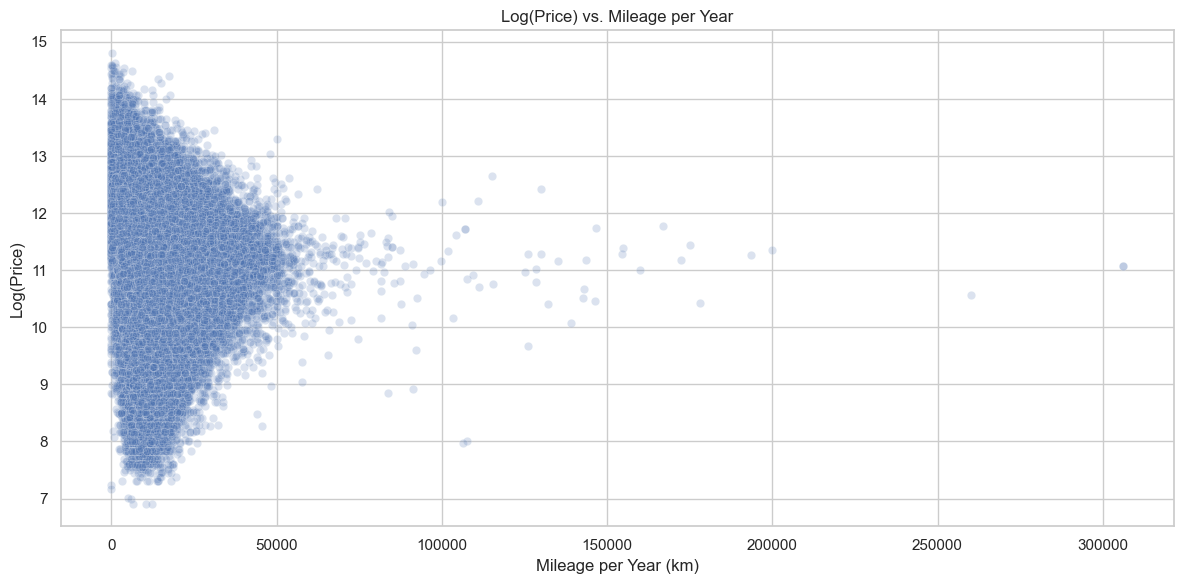

In [341]:
import numpy as np



plt.figure(figsize=(12, 6))
sns.scatterplot(data=cars, x='Mileage_per_Year', y='Log_Price', alpha=0.2)
plt.title('Log(Price) vs. Mileage per Year')
plt.xlabel('Mileage per Year (km)')
plt.ylabel('Log(Price)')
plt.tight_layout()
plt.show()

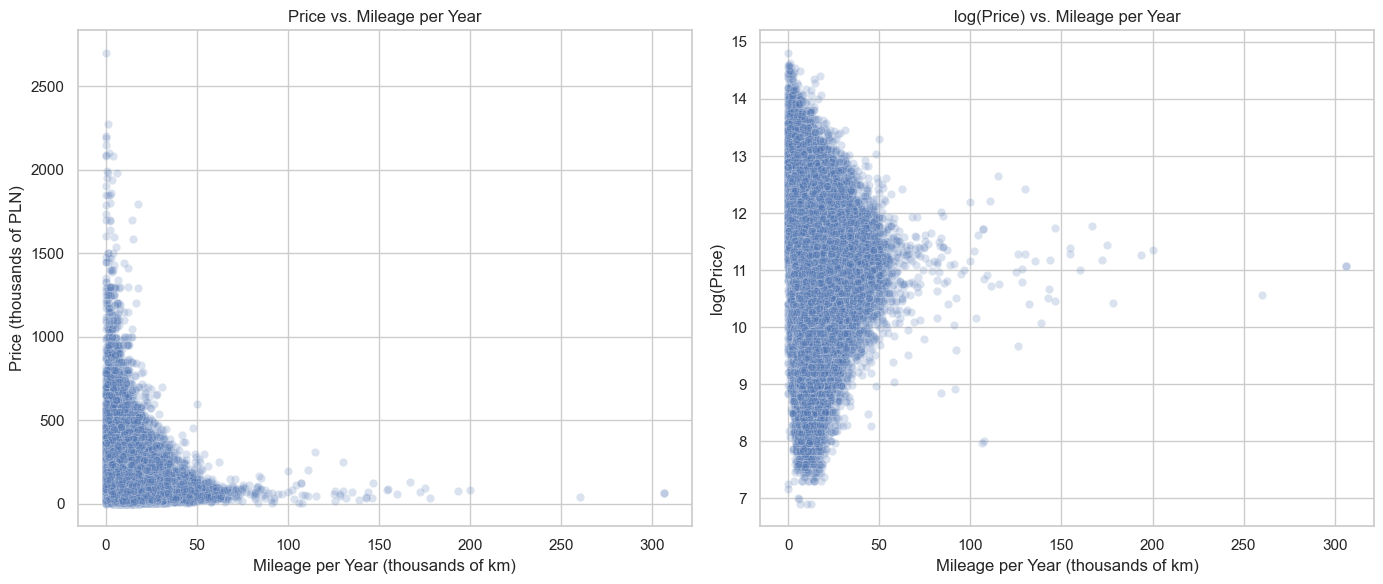

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Rysuj dwa wykresy obok siebie
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Cena vs. przebieg roczny (w tysiącach)
sns.scatterplot(
    data=cars,
    x=cars['Mileage_per_Year'] / 1000,
    y=cars['Price'] / 1000,
    alpha=0.2,
    ax=axes[0]
)
axes[0].set_title('Price vs. Mileage per Year')
axes[0].set_xlabel('Mileage per Year (thousands of km)')
axes[0].set_ylabel('Price (thousands of PLN)')

# Log(Cena) vs. przebieg roczny (Mileage per Year w tysiącach)
sns.scatterplot(
    data=cars,
    x=cars['Mileage_per_Year'] / 1000,
    y=cars['Log_Price'],
    alpha=0.2,
    ax=axes[1]
)
axes[1].set_title('log(Price) vs. Mileage per Year')
axes[1].set_xlabel('Mileage per Year (thousands of km)')
axes[1].set_ylabel('log(Price)')

fig.tight_layout()
plt.show()

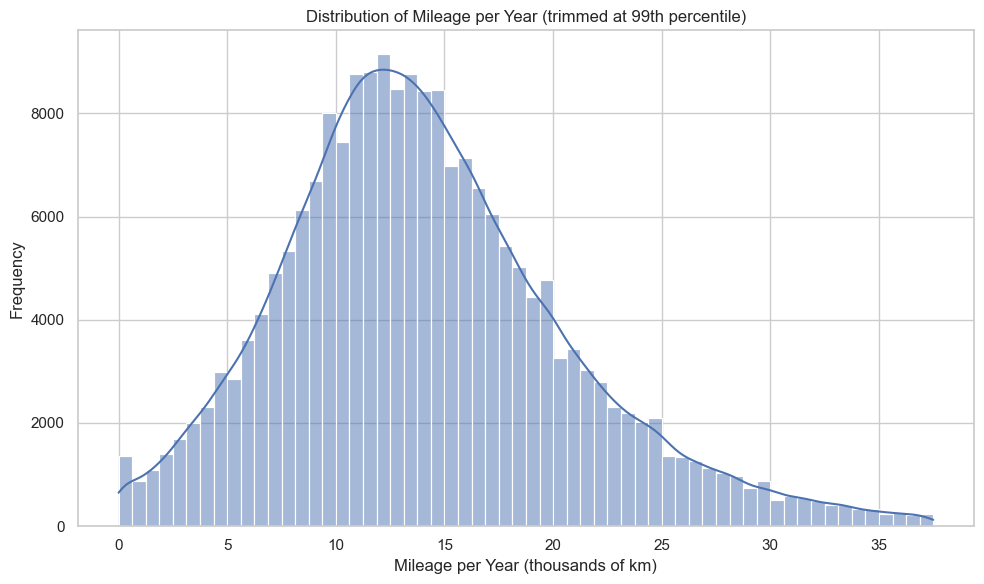

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Oblicz 99. percentyl dla Mileage_per_Year
q99 = cars['Mileage_per_Year'].quantile(0.99)

# Filtrowanie danych i przeliczenie na tysiące
filtered = cars[cars['Mileage_per_Year'] <= q99]

plt.figure(figsize=(10, 6))
sns.histplot(filtered['Mileage_per_Year'] / 1000, bins=60, kde=True)
plt.title('Distribution of Mileage per Year (trimmed at 99th percentile)')
plt.xlabel('Mileage per Year (thousands of km)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

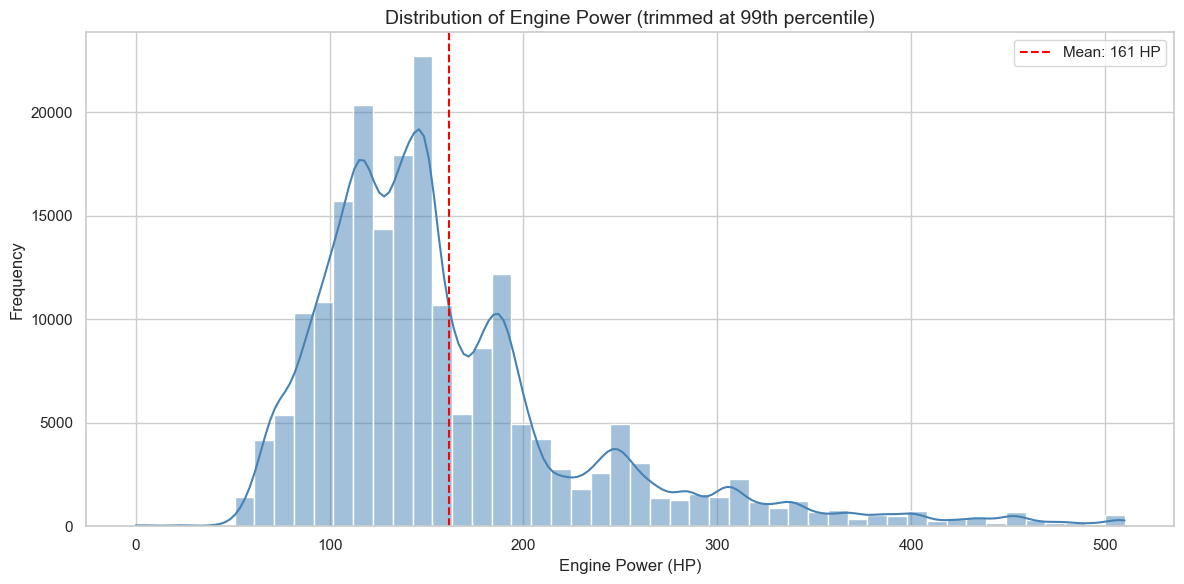

In [344]:
# Oblicz 99. percentyl
p99 = filtered['Engine_Power'].quantile(0.99)

# Filtrowanie danych do 99. percentyla
filtered_trimmed = filtered[filtered['Engine_Power'] <= p99]

# Obliczenie nowej średniej (opcjonalnie)
mean_power_trimmed = filtered_trimmed['Engine_Power'].mean()

# Rysowanie histogramu
plt.figure(figsize=(12, 6))
sns.histplot(filtered_trimmed['Engine_Power'], bins=50, kde=True, color='steelblue')
plt.axvline(mean_power_trimmed, color='red', linestyle='--', label=f'Mean: {mean_power_trimmed:.0f} HP')
plt.title('Distribution of Engine Power (trimmed at 99th percentile)', fontsize=14)
plt.xlabel('Engine Power (HP)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


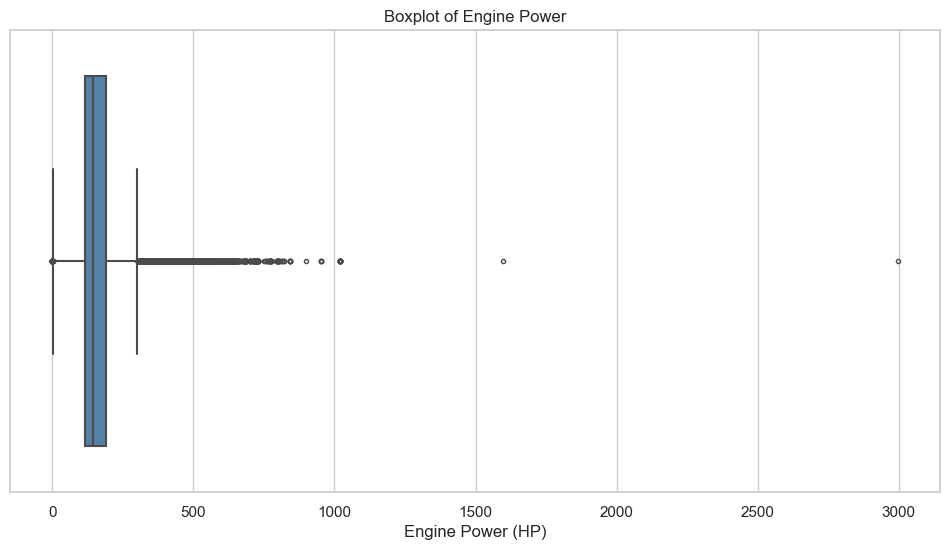

Number of high outliers: 14577


In [345]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=cars['Engine_Power'], color="steelblue", fliersize=3, linewidth=1.5)
plt.title("Boxplot of Engine Power")
plt.xlabel("Engine Power (HP)")
plt.show()

# Obliczenie liczby wartości odstających powyżej górnej granicy (upper whisker)
Q1 = cars['Engine_Power'].quantile(0.25)
Q3 = cars['Engine_Power'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = cars[cars['Engine_Power'] > upper_bound]
print(f"Number of high outliers: {len(outliers)}")

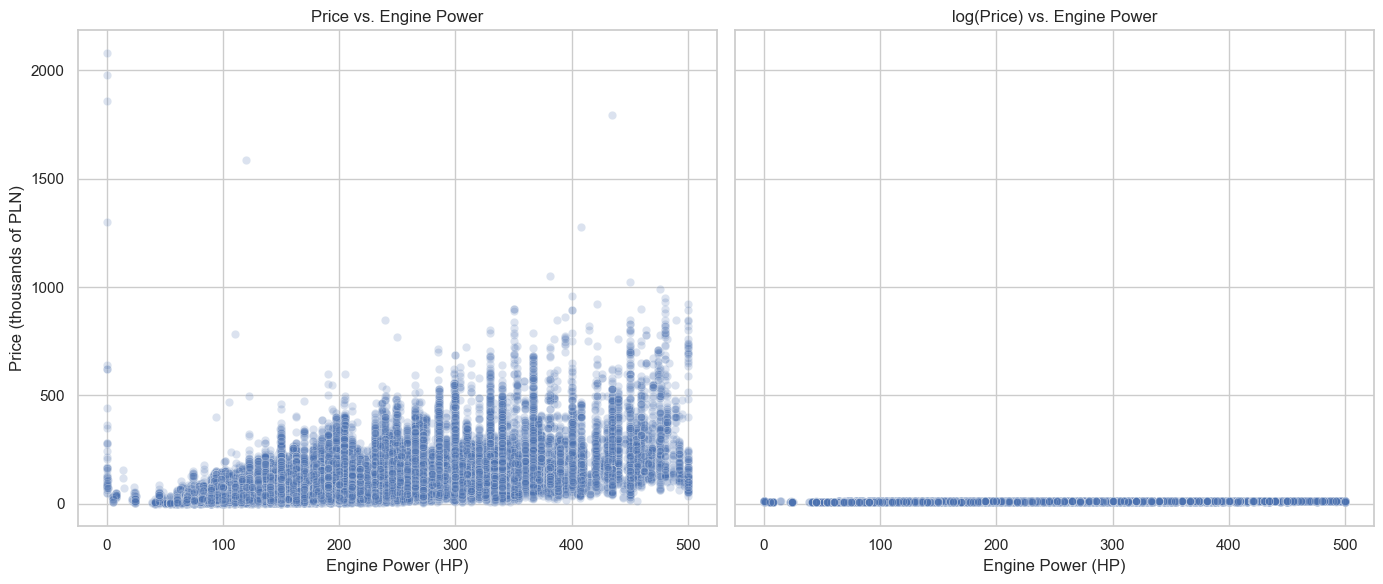

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrowanie ekstremalnych wartości
filtered = cars[cars['Engine_Power'] <= 500].copy()

# Cena w tysiącach zł
filtered['Price_k'] = filtered['Price'] / 1000

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Wykres 1: Cena vs moc
sns.scatterplot(data=filtered, x='Engine_Power', y='Price_k', alpha=0.2, ax=axes[0])
axes[0].set_title('Price vs. Engine Power')
axes[0].set_xlabel('Engine Power (HP)')
axes[0].set_ylabel('Price (thousands of PLN)')

# Wykres 2: log(Cena) vs moc
sns.scatterplot(data=filtered, x='Engine_Power', y='Log_Price', alpha=0.2, ax=axes[1])
axes[1].set_title('log(Price) vs. Engine Power')
axes[1].set_xlabel('Engine Power (HP)')
axes[1].set_ylabel('log(Price)')

fig.tight_layout()
plt.show()

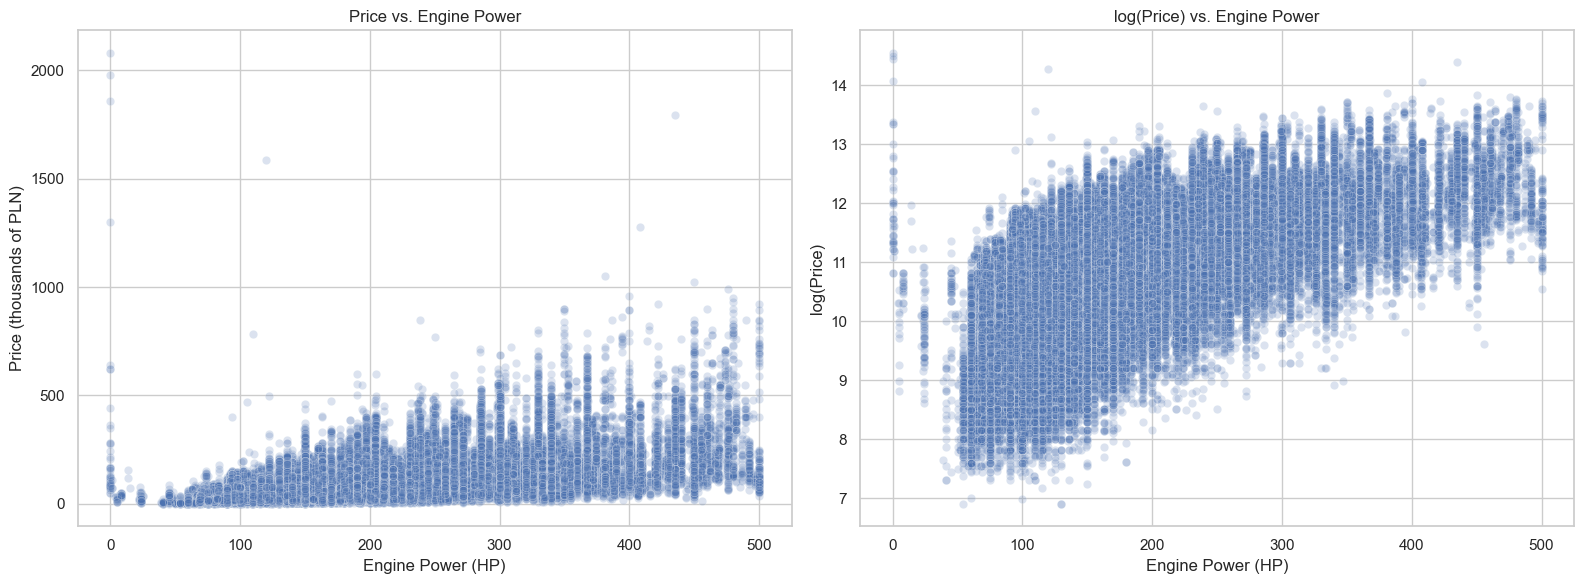

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrowanie sensownego zakresu mocy
filtered = cars[(cars['Engine_Power'] >= 0) & (cars['Engine_Power'] <= 500)].copy()

# Tworzenie zmiennej log(Price), zabezpieczenie przed log(0)
filtered['Log_Price'] = np.log(filtered['Price'].clip(lower=1000))

# Cena w tysiącach
filtered['Price_Thousands'] = filtered['Price'] / 1000

# Rysowanie dwóch wykresów
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Lewy: cena (w tys.) vs moc silnika
sns.scatterplot(data=filtered, x='Engine_Power', y='Price_Thousands', alpha=0.2, ax=axes[0])
axes[0].set_title('Price vs. Engine Power')
axes[0].set_xlabel('Engine Power (HP)')
axes[0].set_ylabel('Price (thousands of PLN)')

# Prawy: log(cena) vs moc silnika
sns.scatterplot(data=filtered, x='Engine_Power', y='Log_Price', alpha=0.2, ax=axes[1])
axes[1].set_title('log(Price) vs. Engine Power')
axes[1].set_xlabel('Engine Power (HP)')
axes[1].set_ylabel('log(Price)')

fig.tight_layout()
plt.show()

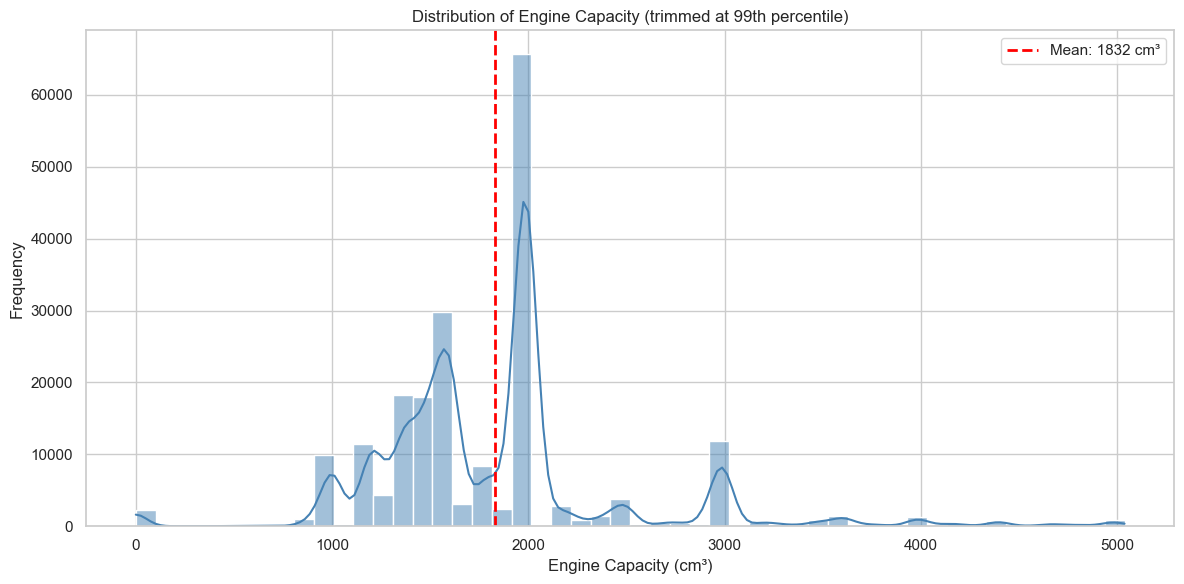

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns

# Oblicz 99. percentyl
cap_99 = cars['Engine_Capacity'].quantile(0.99)

# Filtrowanie: do 99. percentyla i górna granica 8000 cm³
filtered = cars[(cars['Engine_Capacity'] <= cap_99) & (cars['Engine_Capacity'] <= 8000)]

# Oblicz średnią
mean_val = int(filtered['Engine_Capacity'].mean())

# Wykres
plt.figure(figsize=(12, 6))
sns.histplot(filtered['Engine_Capacity'], kde=True, bins=50, color='steelblue')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val} cm³')

plt.title('Distribution of Engine Capacity (trimmed at 99th percentile)')
plt.xlabel('Engine Capacity (cm³)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

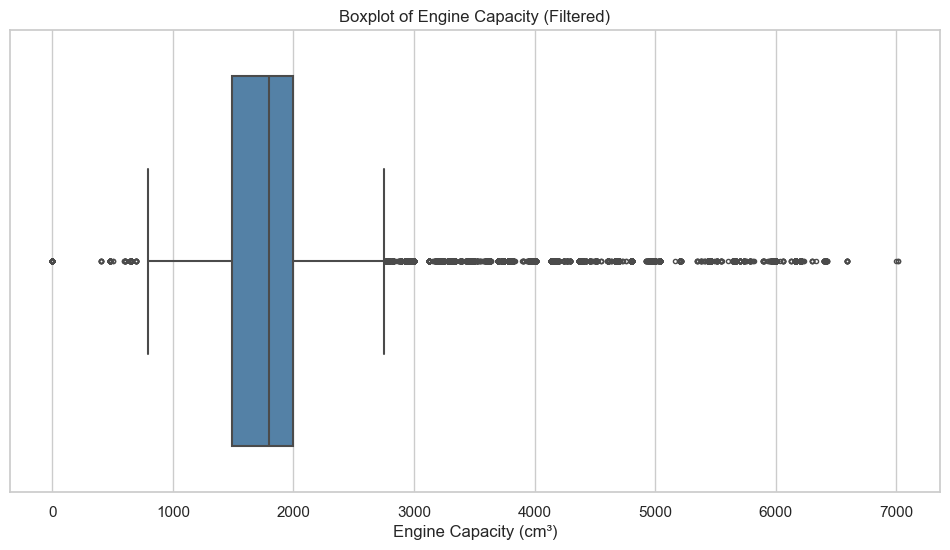

Number of high outliers: 22182
Number of low outliers: 2394
Number of extreme outliers (Engine Capacity ≥ 10000 cm³): 3


In [349]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrowanie wartości ekstremalnych (powyżej 10 000 cm³)
threshold = 10000
filtered = cars[cars['Engine_Capacity'] < threshold]

# Rysowanie boxplota
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered['Engine_Capacity'], color="steelblue", fliersize=3, linewidth=1.5)
plt.title("Boxplot of Engine Capacity (Filtered)")
plt.xlabel("Engine Capacity (cm³)")
plt.show()

# Obliczanie liczby zwykłych outlierów wg IQR
Q1 = filtered['Engine_Capacity'].quantile(0.25)
Q3 = filtered['Engine_Capacity'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

high_outliers = filtered[filtered['Engine_Capacity'] > upper_bound]
low_outliers = filtered[filtered['Engine_Capacity'] < lower_bound]

print(f"Number of high outliers: {len(high_outliers)}")
print(f"Number of low outliers: {len(low_outliers)}")

# Liczba wartości ekstremalnych (≥ 10000 cm³)
extreme = cars[cars['Engine_Capacity'] >= threshold]
print(f"Number of extreme outliers (Engine Capacity ≥ {threshold} cm³): {len(extreme)}")

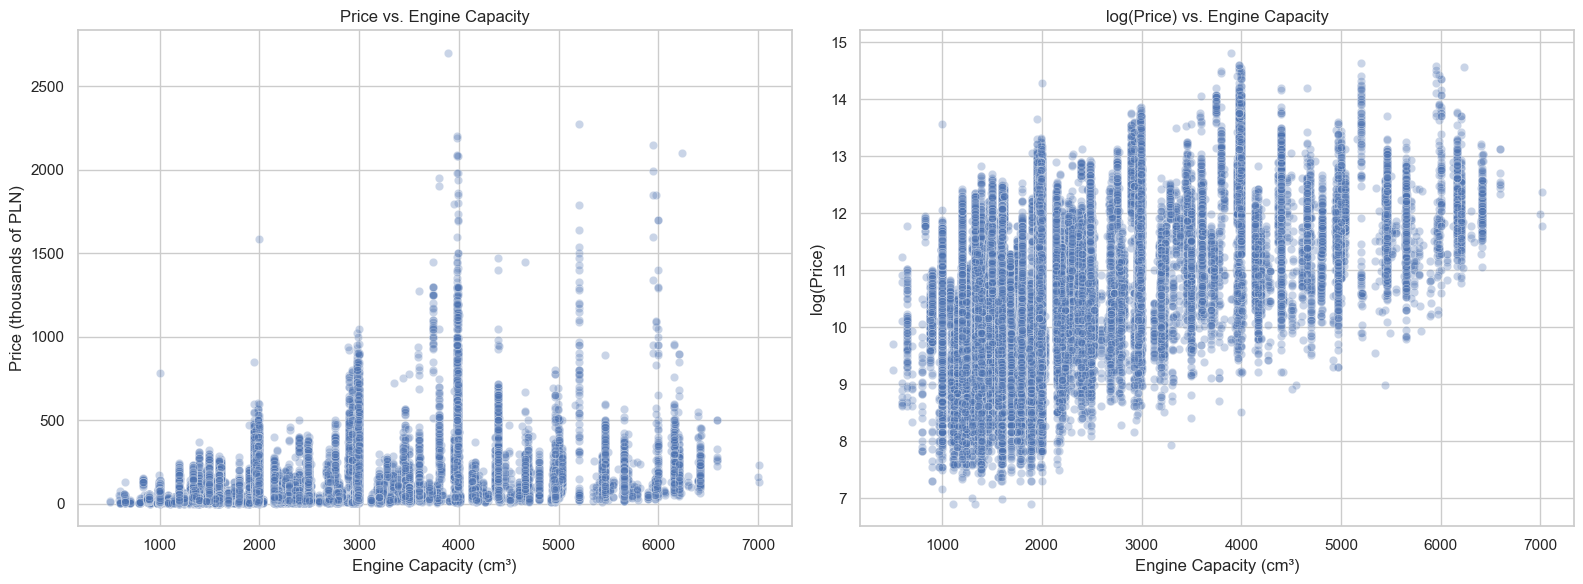

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Zakładam, że masz już DataFrame o nazwie 'cars' z kolumnami:
# 'Price' (w złotówkach) i 'Engine_Capacity' (w cm³)

# Przycinanie do rozsądnego zakresu pojemności
filtered = cars[(cars['Engine_Capacity'] >= 500) & (cars['Engine_Capacity'] <= 8000)].copy()

# Cena w tysiącach złotych
filtered['Price_Thousands'] = filtered['Price'] / 1000

# Logarytm naturalny ceny
filtered['Log_Price'] = np.log(filtered['Price'])

# Rysowanie wykresów
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Lewy panel: Cena vs Pojemność silnika
sns.scatterplot(data=filtered, x='Engine_Capacity', y='Price_Thousands', alpha=0.3, ax=axes[0])
axes[0].set_title('Price vs. Engine Capacity')
axes[0].set_xlabel('Engine Capacity (cm³)')
axes[0].set_ylabel('Price (thousands of PLN)')

# Prawy panel: log(Cena) vs Pojemność silnika
sns.scatterplot(data=filtered, x='Engine_Capacity', y='Log_Price', alpha=0.3, ax=axes[1])
axes[1].set_title('log(Price) vs. Engine Capacity')
axes[1].set_xlabel('Engine Capacity (cm³)')
axes[1].set_ylabel('log(Price)')

plt.tight_layout()
plt.show()

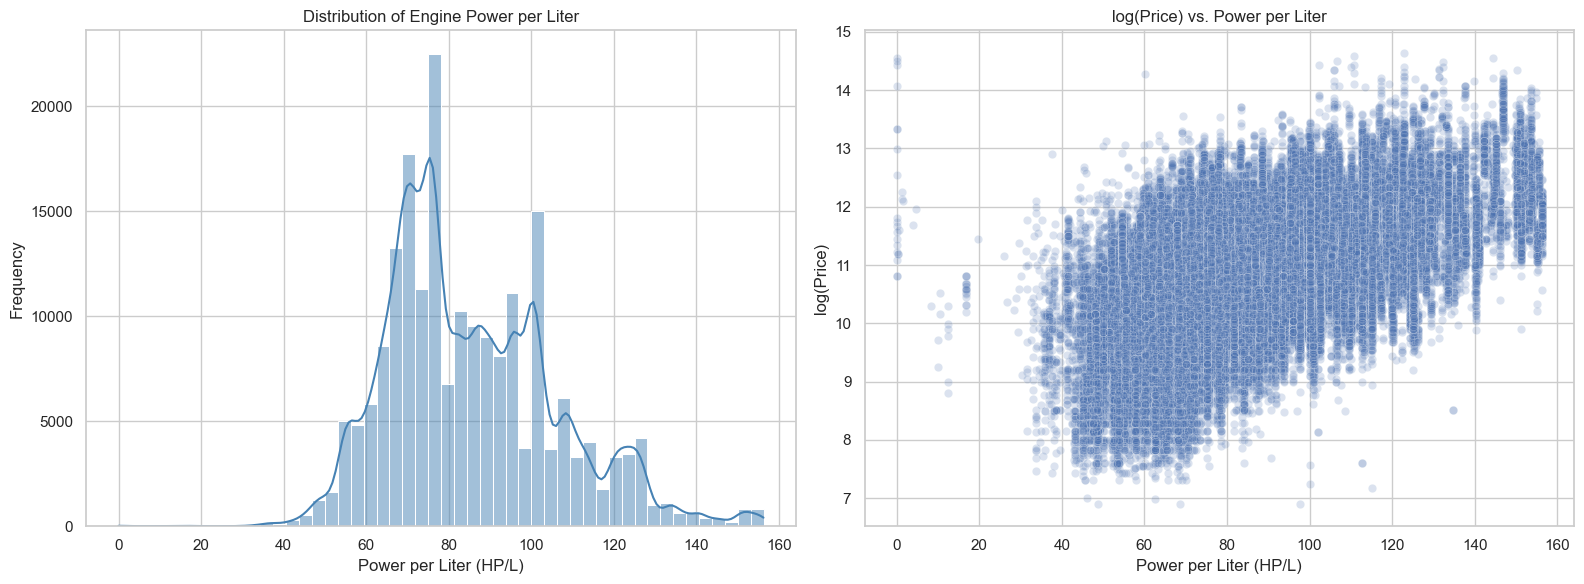

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Oblicz 99. percentyl na ograniczonym zbiorze
p99 = np.nanpercentile(cars['Power_per_Liter'], 99)

# Filtrowanie do histogramu i scatterplota
filtered = cars[cars['Power_per_Liter'] <= p99]

# Tworzenie jednej figury z dwoma wykresami
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram na lewym panelu
sns.histplot(filtered['Power_per_Liter'].dropna(), bins=50, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title('Distribution of Engine Power per Liter')
axes[0].set_xlabel('Power per Liter (HP/L)')
axes[0].set_ylabel('Frequency')

# Scatter plot na prawym panelu
sns.scatterplot(data=filtered, x='Power_per_Liter', y='Log_Price', alpha=0.2, ax=axes[1])
axes[1].set_title('log(Price) vs. Power per Liter')
axes[1].set_xlabel('Power per Liter (HP/L)')
axes[1].set_ylabel('log(Price)')

plt.tight_layout()
plt.show()

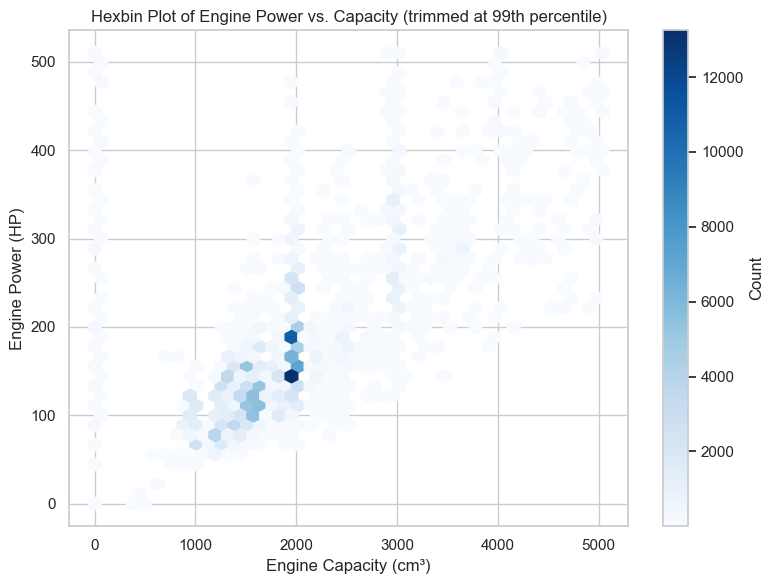

In [352]:
import matplotlib.pyplot as plt
import numpy as np

# Oblicz 99. percentyle
cap_p99 = np.nanpercentile(cars['Engine_Capacity'], 99)
pow_p99 = np.nanpercentile(cars['Engine_Power'], 99)

# Filtrowanie
filtered = cars[(cars['Engine_Capacity'] <= cap_p99) & 
                (cars['Engine_Power'] <= pow_p99)]

# Wykres
plt.figure(figsize=(8, 6))
hb = plt.hexbin(
    filtered['Engine_Capacity'],
    filtered['Engine_Power'],
    gridsize=40,
    cmap='Blues',
    mincnt=5
)
cb = plt.colorbar(hb)
cb.set_label('Count')
plt.xlabel('Engine Capacity (cm³)')
plt.ylabel('Engine Power (HP)')
plt.title('Hexbin Plot of Engine Power vs. Capacity (trimmed at 99th percentile)')
plt.tight_layout()
plt.show()

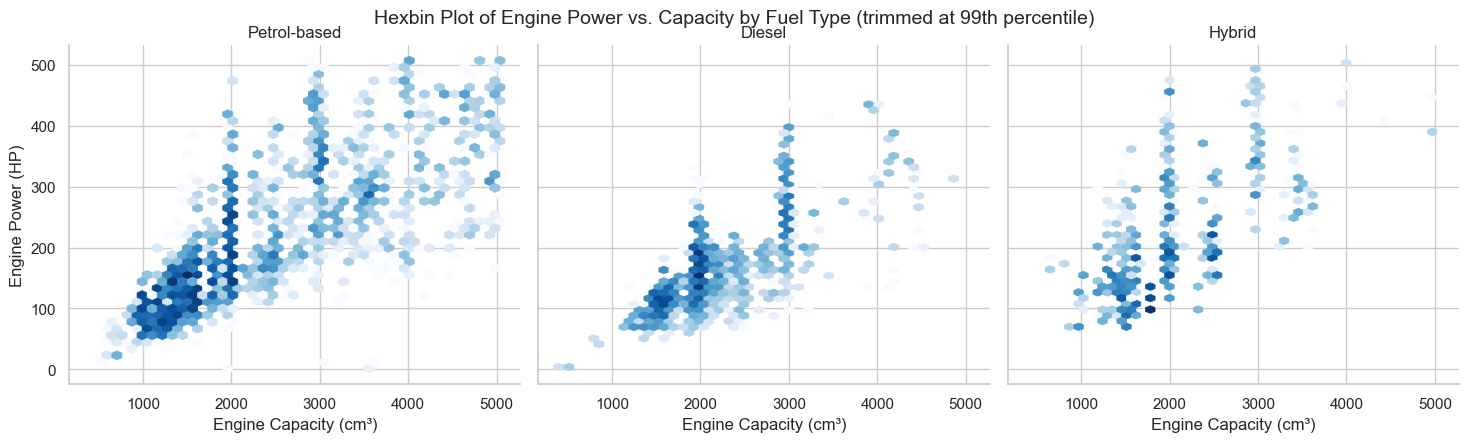

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrowanie aut z poprawnymi wartościami
cars_filtered = cars[(cars['Engine_Capacity'] > 0) & (cars['Engine_Power'] > 0)]

# Przycięcie do 99. percentyla
cap_p99 = np.percentile(cars_filtered['Engine_Capacity'], 99)
pow_p99 = np.percentile(cars_filtered['Engine_Power'], 99)

subset = cars_filtered[
    (cars_filtered['Engine_Capacity'] <= cap_p99) &
    (cars_filtered['Engine_Power'] <= pow_p99)
]

# Tworzenie siatki wykresów
g = sns.FacetGrid(subset, col="Fuel_Type", col_wrap=3, height=4.5, aspect=1.1)

# Użycie hexbin w każdej podgrupie
def hexbin_func(x, y, color, **kwargs):
    plt.hexbin(x, y, gridsize=40, cmap="Blues", bins="log", linewidths=0.5)

g.map(hexbin_func, "Engine_Capacity", "Engine_Power")

# Dodanie tytułów i etykiet
g.set_axis_labels("Engine Capacity (cm³)", "Engine Power (HP)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Hexbin Plot of Engine Power vs. Capacity by Fuel Type (trimmed at 99th percentile)", fontsize=14)

plt.show()

In [354]:
import numpy as np
import pandas as pd



# Wybór zmiennych liczbowych do analizy
numeric_vars = ['Mileage', 'Age', 'Engine_Power', 'Engine_Capacity', 'Log_Price']

# Korelacje między zmiennymi liczbowymi
correlations = cars[numeric_vars].corr().round(3)

# Korelacje z log_price
log_price_corr = correlations['Log_Price'].drop('Log_Price').sort_values(ascending=False)

# Wyświetlenie korelacji
print("Correlations with log(price):")
print(log_price_corr)

Correlations with log(price):
Engine_Power       0.600
Engine_Capacity    0.237
Mileage           -0.608
Age               -0.758
Name: Log_Price, dtype: float64


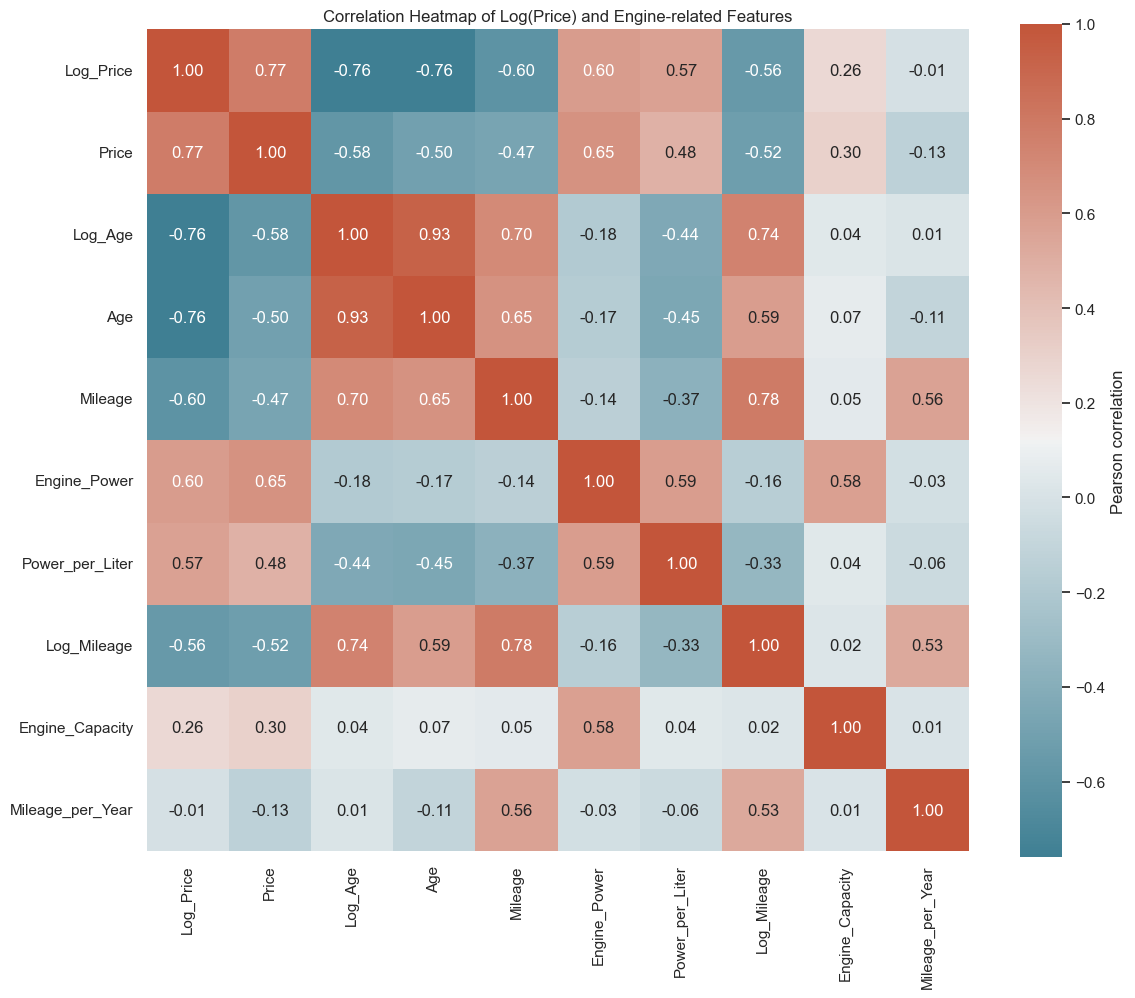

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Rozszerzony zestaw cech ilościowych do EDA
selected_features = [
    'Log_Price', 'Price', 'Age', 'Log_Age',
    'Mileage', 'Log_Mileage', 'Mileage_per_Year',
    'Engine_Power', 'Engine_Capacity', 'Power_per_Liter'
]

# Usunięcie wierszy z brakami danych
subset = cars[selected_features].dropna()

# Obliczenie i posortowanie macierzy korelacji względem Log_Price
corr_matrix = subset.corr()
sorted_features = corr_matrix['Log_Price'].abs().sort_values(ascending=False).index
corr_sorted = corr_matrix.loc[sorted_features, sorted_features]

# Rysowanie heatmapy
plt.figure(figsize=(12, 10))
sns.heatmap(corr_sorted, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True),
            fmt=".2f", square=True, cbar_kws={'label': 'Pearson correlation'})
plt.title('Correlation Heatmap of Log(Price) and Engine-related Features')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `log_price` for `y`. An entry with this name does not appear in `data`.

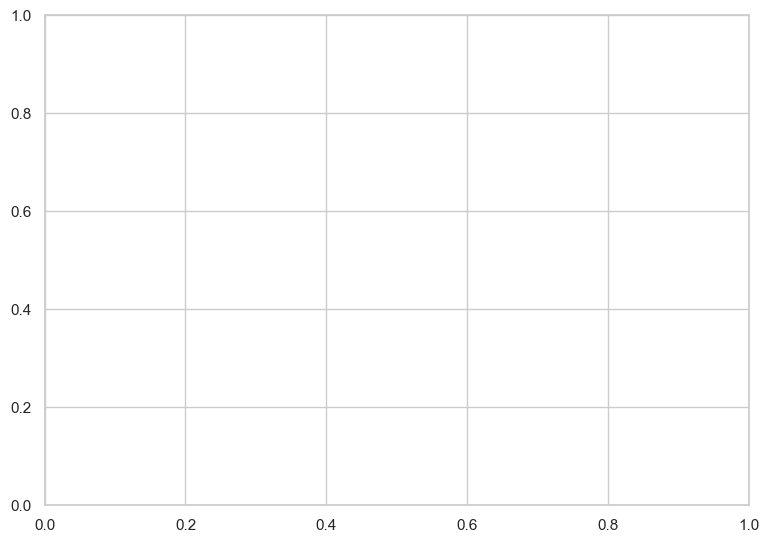

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładamy, że masz już DataFrame `cars` i kolumnę log_price
# cars['log_price'] = np.log(cars['Price'])

categorical_features = ['Fuel_Type', 'Body_Type', 'Gearbox', 'Transmission']
plt.figure(figsize=(20, 14))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=cars, x=feature, y='log_price', palette='Set2')
    plt.title(f'Log(Price) by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log(Price)')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

/var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/ipykernel_79334/1782276989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette='Set2')
/var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/ipykernel_79334/1782276989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette='Set2')
/var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/ipykernel_79334/1782276989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.index, y=medians.values, palette='Set2')
/var/folde

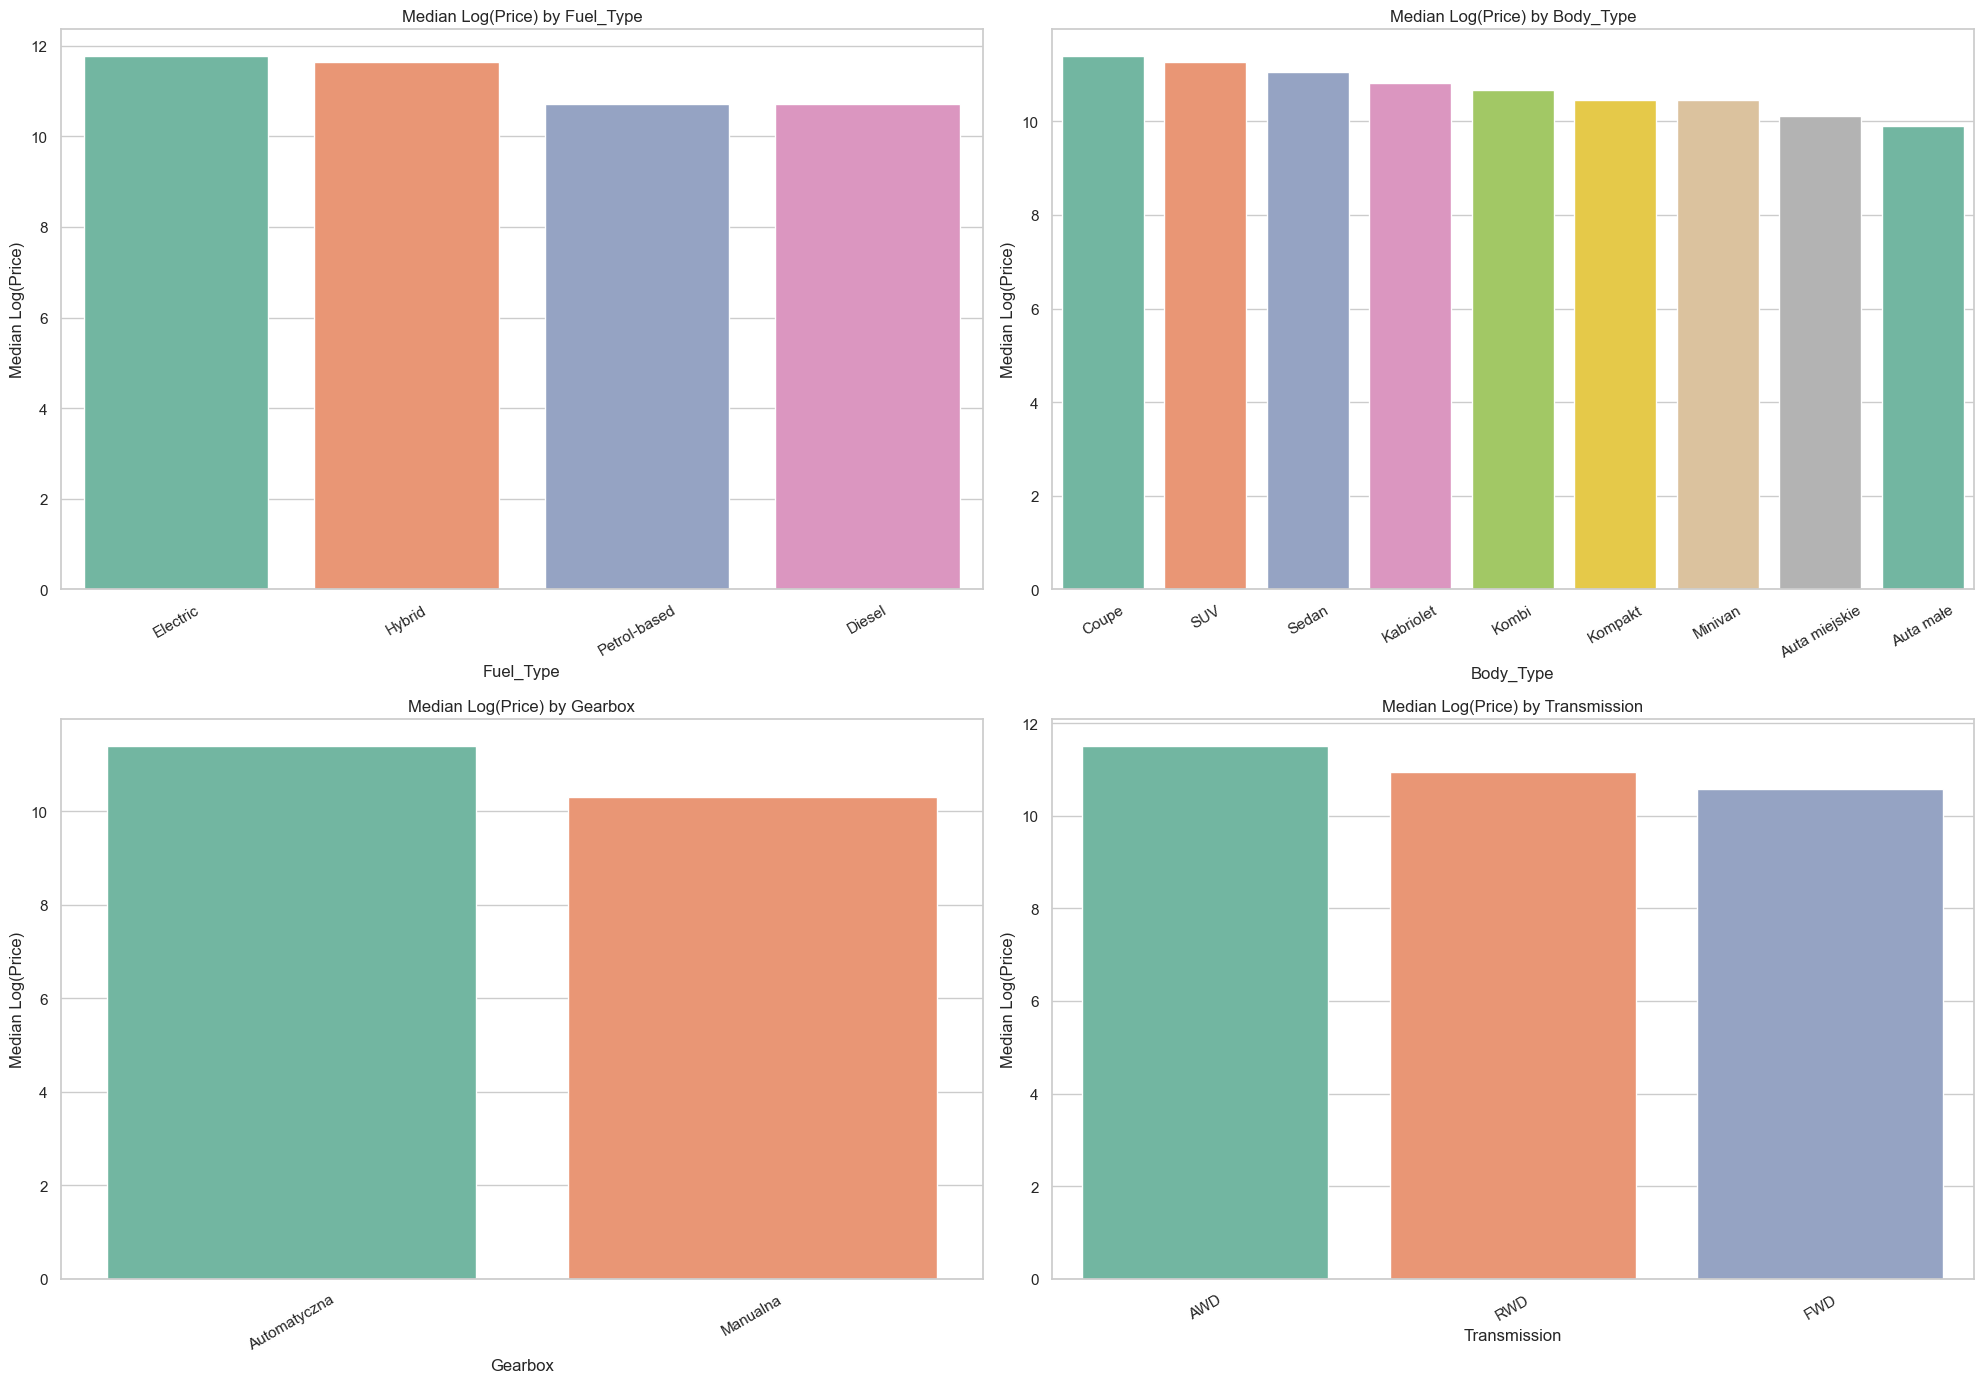

In [ ]:
plt.figure(figsize=(20, 14))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    medians = cars.groupby(feature)['log_price'].median().sort_values(ascending=False)
    sns.barplot(x=medians.index, y=medians.values, palette='Set2')
    plt.title(f'Median Log(Price) by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median Log(Price)')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

/var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/ipykernel_79334/4036671876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cars, x=feature, order=cars[feature].value_counts().index, palette='Set2')
/var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/ipykernel_79334/4036671876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cars, x=feature, order=cars[feature].value_counts().index, palette='Set2')
/var/folders/7r/z43hm4_x3t9b482wypqy2s6r0000gn/T/ipykernel_79334/4036671876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countpl

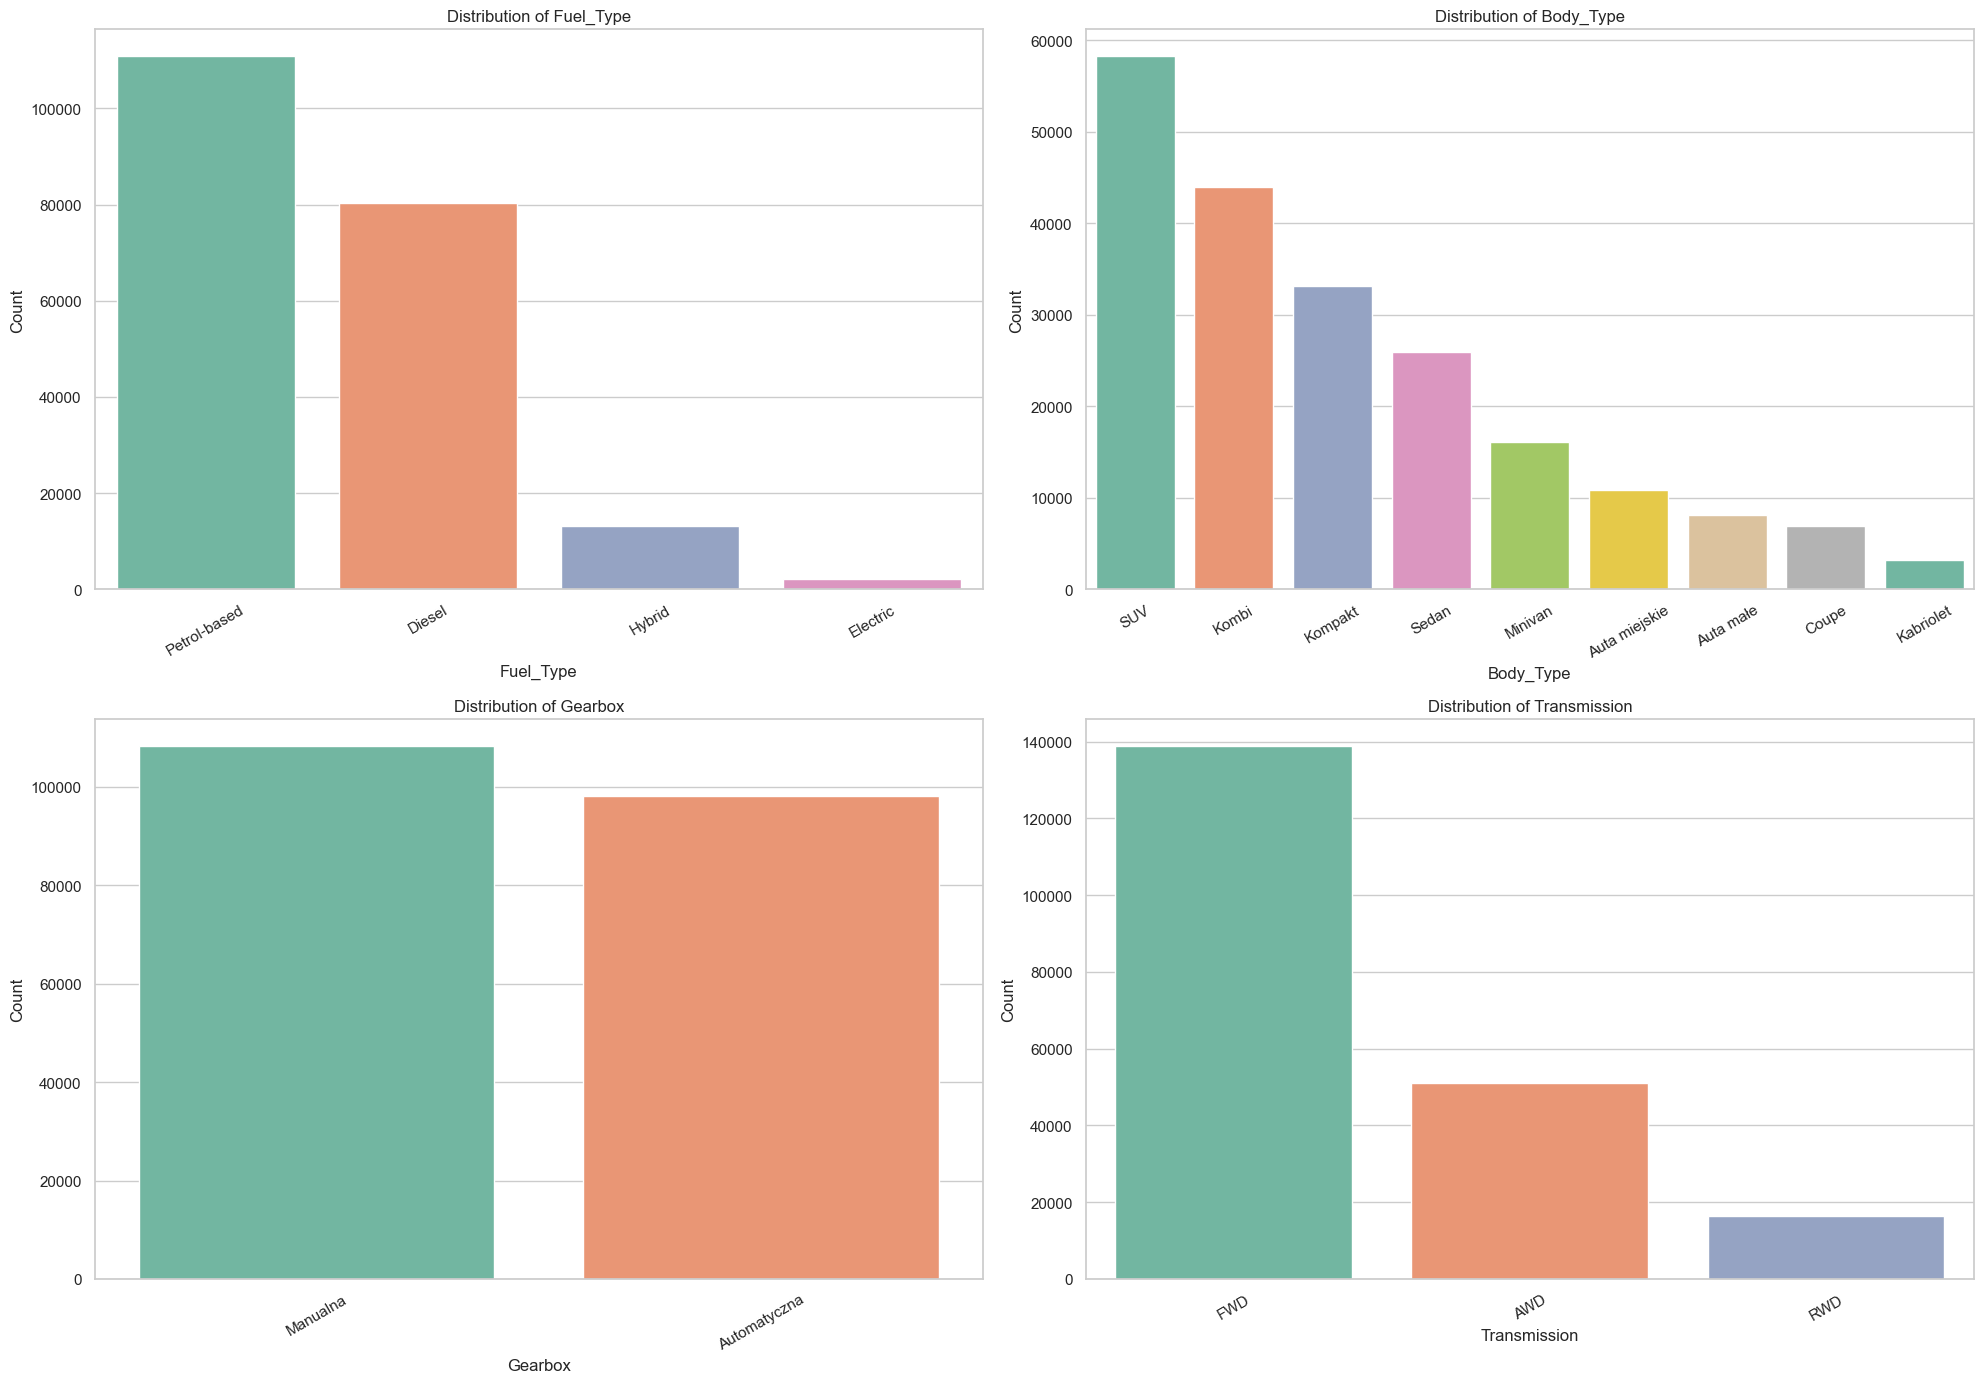

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Fuel_Type', 'Body_Type', 'Gearbox', 'Transmission']
plt.figure(figsize=(20, 14))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=cars, x=feature, order=cars[feature].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

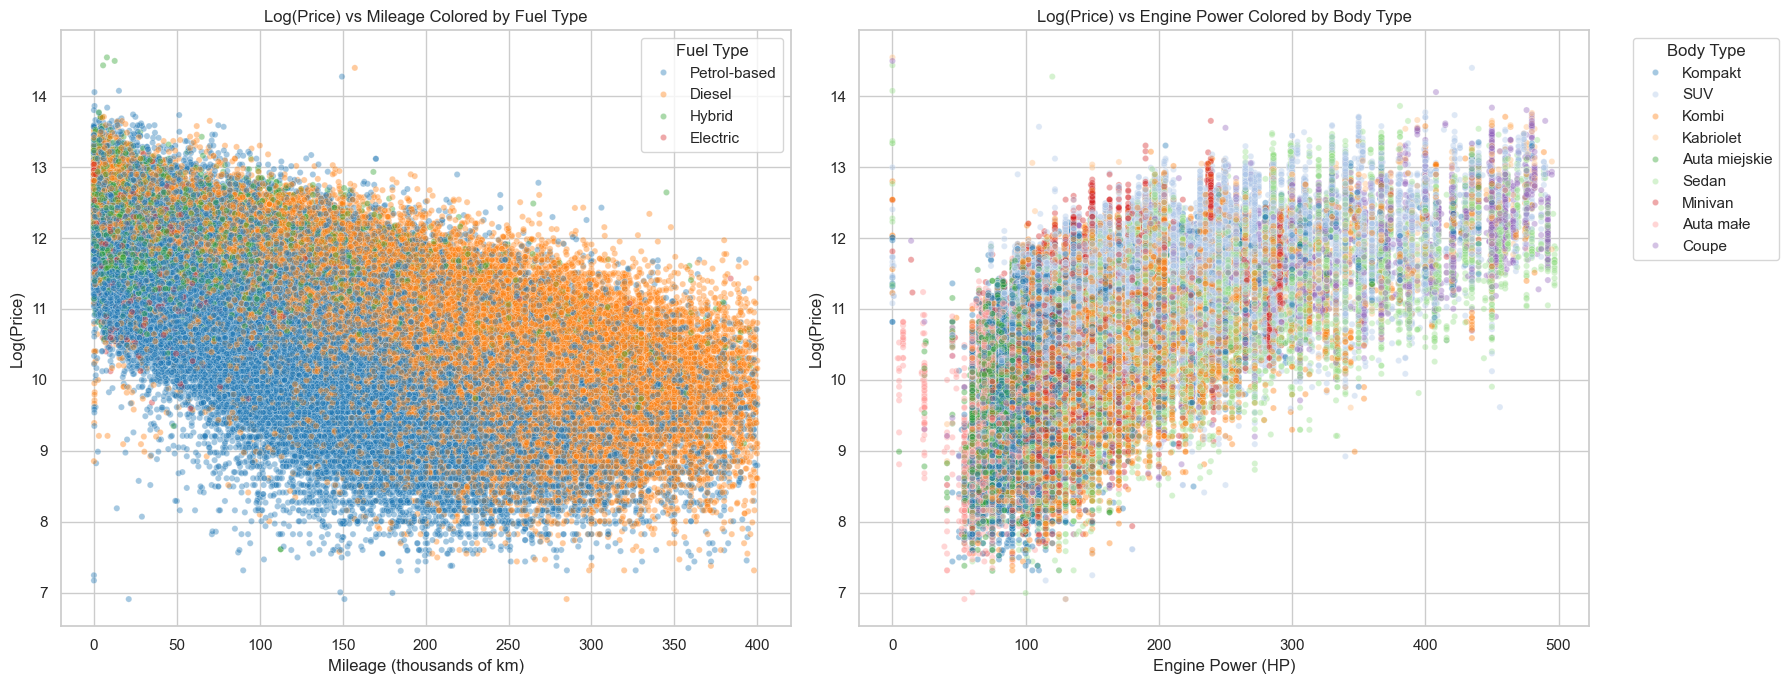

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrowanie ekstremalnych wartości
filtered = cars[(cars['Mileage'] < 400000) & (cars['Engine_Power'] < 500)].copy()
filtered['Mileage_thousands'] = filtered['Mileage'] / 1000  # konwersja na tysiące km

# Tworzenie połączonych wykresów
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Wykres 1: Cena vs. przebieg, kolor wg typu paliwa (mało kategorii → tab10)
sns.scatterplot(
    data=filtered, x='Mileage_thousands', y='log_price',
    hue='Fuel_Type', alpha=0.4, s=20, ax=axes[0], palette='tab10'
)
axes[0].set_title('Log(Price) vs Mileage Colored by Fuel Type')
axes[0].set_xlabel('Mileage (thousands of km)')
axes[0].set_ylabel('Log(Price)')
axes[0].legend(title='Fuel Type')

# Wykres 2: Cena vs. moc, kolor wg typu nadwozia (więcej kategorii → tab20)
sns.scatterplot(
    data=filtered, x='Engine_Power', y='log_price',
    hue='Body_Type', alpha=0.4, s=20, ax=axes[1], palette='tab20'
)
axes[1].set_title('Log(Price) vs Engine Power Colored by Body Type')
axes[1].set_xlabel('Engine Power (HP)')
axes[1].set_ylabel('Log(Price)')
axes[1].legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()